# Install and import packages

In [ ]:
!pip install yfinance==0.2.54

In [ ]:
#Standard packages
import numpy as np
import pandas as pd

#Statistics
from scipy import stats, optimize
import random

#Finance
import yfinance as yf

#Dates
from datetime import datetime

#Plotting packages
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams["font.size"] = 20
rcParams["axes.labelsize"] = 30
rcParams["xtick.labelsize"] = 16
rcParams["ytick.labelsize"] = 16

rcParams["figure.figsize"] = (8,6)

#One-dimensional Wiener process

The Wiener process is a continuous stochastic process characterized by independent increments that are distributed according to a Gaussian distribution. It can be seen as the continuum limit of a Random Walk. The stochastic process can be characterized with the following equation

\begin{equation}
   X(t + 1) = X(t) + \mathcal{N}(0, D)
\end{equation}

where $X(t)$ is the random variable characterizing the stochastic process, $D$ is the diffusion coefficient of the process, and $\mathcal{N}(\mu,\sigma^2)$ is a normal distribution with mean $\mu$ and variance $\sigma^2$.  

The Wiener process has many interesting properties that make it the basis upon which to build our models for price dynamics, for instance:


* $\mathbb{E}[X(t)] = 0$
* $\mathbb{E}[X^2(t)] = Dt$
* $X(t) \sim x_0+\mathcal{N}(0, Dt)$
* $X(t)$ is a martingale; this is, it fulfills the fair game condition: $\mathbb{E}[X(t+1)|X(t),X(t-1),...,X(0)] = X(t)$

Here, $\mathbb{E}[\cdot]$ is the expected value (this is the standard notation in math and finance, physicists usually prefer the notation $\langle \cdot \rangle$).

**Optional task: prove the above four properties of Brownian motion analytically.** You will need the following properties:

(1) The sum of two Gaussians $\mathcal{N}(\mu_1,\sigma_1^2)$ and $\mathcal{N}(\mu_2,\sigma_2^2)$ is another Gaussian $\mathcal{N}(\mu_1+\mu_2,\sigma_1^2+\sigma_2^2)$.

(2) Law of the unconscious statistician: The expected value of a function $g$ is $\mathbb E[g(x)]=\int f(x) g(x) dx$, where $f(x)$ is the probability density function of $X$ (for the conditional expected value, substitute $f(x)$ with the conditional probability density).



\#\# Your answer here (you can use latex for mathematical symbols)


# Exercise 1

1. Create a function that numerically generates trajectories of a specified length $N$, following a Wiener process.

  **Clue:** *To generate random numbers following a Gaussian distribution, you can use `np.random.normal(mean,std,size)`. To generate the whole trajectory at once, create a random array and then use the method `np.cumsum()` to perform a cumulative sum of the array*.


In [ ]:
def create_trajectory(D,N):
  # YOUR CODE


2. Generate and plot 100 trajectories of the brownian motion together with the mean trajectory using $\Delta t=10^{-3}$, $T=10$ and $D=1$ (note that $T=N \Delta t$) .


In [ ]:
# CODE

3. The RMS at time $t$ is defined as the standard deviation of $X(t)$: $\textrm{MSD}(t) = \mathbb{E}[(X(t)-\mathbb{E}[X(t)])^2]$ (note that the expected values are over realizations of the stochastic process, not over time). Compute the root mean squared (RMS) displacement for different values of $T$.


  **Clue:** *The numpy methods `sum()`, `mean()`, `std()`... admit an axis parameter, that lets you specify whether the operation should be performed over columns (`axis=0`) or rows (`axis=1`).*


In [ ]:
# CODE

4. Perform a fit of the obtained function using least squares. Report the estimated expression of the function, with the values of the fitted parameters and their uncertainties. Plot the numerical values of $MSD(t)$ and the corresponding fit. Discuss the results (ideally, you should provide an analytical prediction to compare with the numerical results).

  **Clue:** *To fit a set of datapoints to a given function using least squares, you can use the method curve_fit, avaliable in `scipy.optimize`. The syntax of this method is:
`params, covariance = curve_fit(my_function, my_x_datapoints, my_y_datapoints, p0=inital_guess_array)`, where `params` returns an array with the estimated parameters and `covariance` returns the covariance matrix containing the uncertainties. You need to previously define the functional form you want to fit (for example,* `my_function(x,a,b): return np.sin(a*x)+b`). *In this case, I reccomend you to fit a power-law, this is, to assume the MSD is a function $\textrm{MSD}(t)=at^b$.*

In [ ]:
# CODE

#Fitting a data sample to a distribution

In the previous exercise, we learnt how to fit data to a specified function. Many times, however, we don't want to fit an arbitrary function, but a probability distribution (pdf). These mathematical objects have additional structure that can (and should) be exploited; for example, they are normalized and are always positive. There is a powerful method to estimate pdfs called **Maximum Likelihood Estimation (MLE)**. In this section, we will learn how to estimate parameters from pdfs using MLE.

**Optional: research about MLE's mathematical procedure, what it assumes, etc., and provide a 1-2 paragraph summary of what you learnt**.



To fit a particular distribution to a given data sample using MLE, we can use the **`stats.fit`** function. We must however first specify which probability distribution we assume for the data (the problem of statistically deciding which pdf form underlies our data is called non-parametric statistical inference, and it is more challenging, so for now we will take the underlying pdf form as granted). As an example, let's see how to fit synthetic Gaussian-distributed data. We will thus always call the `stats.norm` class (if we wanted to fit another type of pdf, we would call the corresponding scipy.stats class. For instance, if we wanted to fit to a poisson, we would use `stats.poisson`). First, let's generate some random numbers using the `rvs` method:

In [ ]:
#Generate some random numbers according to a normal distribution
mu = 1.1
sigma = 0.6
N = 10**5
my_data = stats.norm.rvs(loc = mu, scale = sigma, size=N)  # rvs samples from the pdf specified via the class we call; here, norm (i.e. normal distribution)


Now, we fit the data to the distribution, by calling `stats.norm.fit`:

In [ ]:
mu_fit, sigma_fit = stats.norm.fit(my_data)

print("---- Fit of Normal distribution ----\n")
print('Mean:',mu_fit)
print('Standard Deviation:',sigma_fit)


---- Fit of Normal distribution ----

Mean: 1.0979242480526106
Standard Deviation: 0.5990682452430026


Lastly, we plot the raw data and the fit together in a histogram. Remember that we saw how to plot histograms using the `hist` method in the first notebook. To plot the analytical pdf (using the estimated values), we can call the `pdf` method within the `stats.norm` class.

Text(0, 0.5, 'PDF')

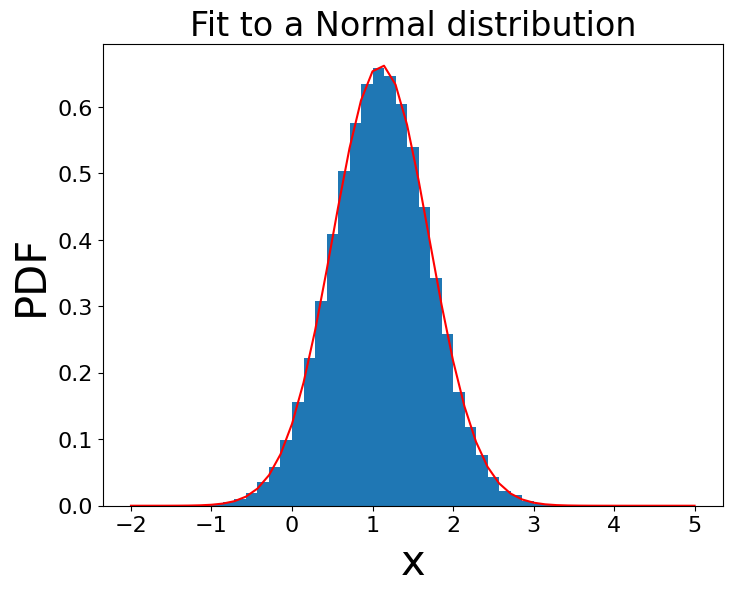

In [ ]:

fig, ax = plt.subplots()
x = np.linspace(-2, 5)
ax.hist(my_data, bins=np.linspace(-2, 5, 50), density=True);
ax.plot(x, stats.norm.pdf(x, mu_fit, sigma_fit), ls="-", color="r")
ax.set_title("Fit to a Normal distribution")
ax.set_xlabel("x")
ax.set_ylabel("PDF")


So, in summary, to fit data to a distribution  with `scipy.stats`, you need the following functions and methods:

- **`scipy.stats.rv_continuous.rvs`**:  
  - Arguments: `loc` (mean), `scale` (standard deviation), `size` (number of samples), and optional distribution-specific parameters.  
  - Example: `scipy.stats.norm.rvs(loc=0, scale=1, size=1000)`.  

- **`scipy.stats.rv_continuous.fit`**:  
  - Arguments: `data` (array-like), optional `loc` and `scale` (initial guesses), and optional `floc` or `fscale` (fixed parameters).  
  - Example: `scipy.stats.norm.fit(data)`.  

- **`scipy.stats.rv_continuous.pdf` / `scipy.stats.rv_discrete.pmf`**:  
  - Arguments: `x` (array-like points to evaluate), `loc` (mean), `scale` (standard deviation), and optional distribution-specific parameters.  
  - Example: `scipy.stats.norm.pdf(x, loc=0, scale=1)`.  

- **`scipy.stats.histogram` (or `matplotlib.pyplot.hist`)**:  
  - Arguments: `data` (array-like), `bins` (number of bins), `density` (True for normalized histogram), and additional style parameters.  
  - Example: `plt.hist(data, bins=30, density=True)`.  


# Exercise 2

(a) Download stock price data from Warner Bros. (WBD) from 1990 until 2019 using daily resolution.

(b) Compute the log returns of the Adjusted Close price data and get rid of the first NaN of the time series.
  **Clue:** *use the df.dropna() method.*  

(c) Fit the distribution of log returns to a Gaussian and to a **Student's t distribution**. Plot the raw data and the two fits in a single plot **in logy scale** (choose the appropriate binning and the appropriate limits of the x and y axes to show so that the plot is visually adequate). Which fit fits the data better? Why do you think so? <br>
 **Clue:** *you can find information about the t-student distribution and its role in finance modelling in the theory slides corresponding to chapter 5*.

(d) **(Optional)** To quantitatively test which fit is better, data scientists use different tools. A very popular one is the Bayesian Information Cirterion (BIC).
The BIC balances goodness of fit (via likelihood) and model complexity (number of parameters).
Its formula is

$\text{BIC} = k \log(n) - 2 \log L$

where $ k $ is the number of parameters in the model, $ n $ is the number of data points, and $ \log L $ is the log-likelihood, computed as $
\log L = \sum_{i=1}^{n} \log f(x_i | \theta)
$
and $ f(x_i | \theta) $ is the PDF evaluated at each data point with fitted parameters $ \theta $. Lower BIC correspond to better models (better trade-off between fit and complexity).


Compute the BIC for the gaussian and t fits and discuss which one is better.

In [ ]:
# YOUR CODE

# Geometric Brownian motion

In financial modeling, we often use geometric Brownian motion (GBM) to describe the behavior of stock prices. This model is favored because it captures two essential characteristics of stock price movements: randomness and growth. In other words, it captures the role of fluctuations in the market, as well as the long-term tendency of stocks to increase in value due to economic expansion. GBM also has important mathematical properties that make it a suitable choice. For instance, it ensures that stock prices remain positive. Mathematically, GBM follows the following equation:

\begin{equation}
   X(t + 1) = X(t) \times \textrm{Lognormal}(0, D),
\end{equation}
where $\textrm{Lognormal}(0, D)$ is the lognormal distribution, defined as the exponential of a normal distribution and with pdf:
$
f(x; \mu, \sigma) =
\begin{cases}
\frac{1}{x \sigma \sqrt{2 \pi}} \exp\left(-\frac{(\ln x - \mu)^2}{2\sigma^2}\right), & x > 0, \\
0, & x \leq 0,
\end{cases}
$


The time evolution of prices follows a GBM stochastic process when the returns follow standard Brownian motion. Indeed, if we recall the relation between prices and log-returns:
\begin{equation}
   R(t) = \log\left(\frac{X(t+1)}{X(t)} \right)  \Leftrightarrow X(t+1)=X(t)\times e^{R(t)},
\end{equation}
and assume the returns follow a Wiener process:
\begin{equation}
   R(t + 1) = R(t) + \mathcal{N}(0, D) \Rightarrow R(t) \sim \mathcal{N}(0,Dt),
\end{equation}
we get directly that $ X(t + 1) = X(t) \times \textrm{Lognormal}(0, D)$ ($e^{R(t)}$ follows a lognormal distribution by the definition of lognormal).


The expected value of a lognormal random variable $X\sim \textrm{Lognormal}(\mu, \sigma^2)$ is:

$
\mathbb{E}[X] = e^{\mu + \frac{\sigma^2}{2}}.
$

**(Optional: prove this fact)**. This means that the volatility of the returns causes a systematic drift in the prices, which is kind of annoying. To remove this, it is common to impose that the returns have a drift term $\tilde \mu = \mu -\frac{\sigma^2}{2}$, so that the prices have a drift $\mu$.


# Exercise 3:

In this exercise, we will simulate the time evolution of the price of a given stock based on historical data. The exercise is long and lets you discuss many modelling assumption, so it is good if you approach it as if you were writing a short report on the topic. Remember: disccusing the results is more important than coding things.

1. Download the data from Netflix (NFLX) for the period 01/01/2015-31/12/2016 with daily resolution. Compute the mean and variance of the log-returns over the whole period.

**Suggestion:** *Even though the exercise don't ask for it, it is good practise to always plot the prices and log returns after generating them, to check if there is missing data, if the processes are stationary...*

2. Simulate 10 different realizations of future log-returns using a Brownian motion with the estimated mean and variance (simulate one year into the future, i.e., $N=252$). Assume the returns follow a normal distribution (how reasonable is this assumption?) with the computed mean and variance.

3. Transform the 10 simulated log returns to new prices using the relation between standard and geometric Brownian motion. Plot the historical prices used to infer the price evolution, and the 10 realizations. Plot also the real evolution that the prices followed and compare them.

**Clue:** *You may use the following relation (why is it true?):*

\begin{equation}
  X(t+k\Delta)=X(t)e^{\sum_{t=0}^k R(t) \Delta} \ ,
\end{equation}

4. Repeat questions 2 and 3: (a) setting the volatility of the returns to zero; and (b) using the historical volatility, but taking the shifted mean returns $\tilde \mu = \mu-\sigma^2/2$. Discuss the results.

**Clue:** *If you solve questions 2 and 3 using functions, the code in this question reduces to calling a function twice*.

5. Now, instead of assuming a Gaussian distribution, fit the log-returns to a t-distribution and simulate future returns by sampling from the fitted distribution. Then repeat question 3, plot the results and discuss them.

**Clue:** `stats.t.fit` *returns three numbers: the first is the degrees of freedom parameter ($\nu$), the second the location and the third the scale.If $\nu\to\infty$, the t distribution converges to a Gaussian, where the location parameter is the mean and the scale is the standard deviation.*